In [2]:
#Importing Libraries :
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Extracting DataFrame From Web :
import pandas_datareader as web

In [66]:
#Stock Symbol Used : Alphabet A Inc - > Google 
# From 1 April 2020 to 30 June 2020
#This data is full collection of all stock features from Google's Stock Market

def UpdateCSV(stock = 'GOOGL', update = True ):
    """
    stock  : (STR) Symbol of the stock. def "GOOGL"
    update : (BOOL) to update csv. def TRUE

    Updates DATA.csv at root by default
    returns stock info as well
    """
    df_g=web.DataReader(stock,data_source='yahoo',start='01-04-2020',end='30-06-2020')
    assert None == df_g.to_csv("DATA.csv")
    return df_g

# to test Func
if 0:
    UpdateCSV()


In [65]:
#The 'DATE' Column has already been parsed to dates , so that we can easily access it as a timestamp object.

# DEMO Reading the CSV
df_g = pd.read_csv("DATA.csv") # read csv
df_g["Date"] = pd.to_datetime(df_g["Date"]) # covert date from string
df_g = df_g.set_index("Date") # set date as index

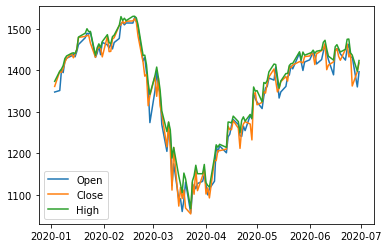

In [50]:
plt.plot(df_g.Open, label = "Open")
plt.plot(df_g.Close, label = "Close")
plt.plot(df_g.High, label = "High")
plt.legend()
plt.show()

In [51]:
df_g.describe()

,High,Low,Open,Close,Volume,Adj Close
count,124.000000,124.000000,124.000000,124.000000,1.240000e+02,124.000000
mean,1368.611288,1331.505083,1350.339189,1351.717182,2.303072e+06,1351.717182
std,119.249311,131.511207,125.506176,124.873566,9.923623e+05,124.873566
min,1066.910034,1008.869995,1056.369995,1054.130005,1.077500e+06,1054.130005
25%,1279.337494,1242.549988,1266.790009,1269.452484,1.550250e+06,1269.452484
50%,1412.850037,1376.025024,1394.899963,1396.140015,1.998800e+06,1396.140015
75%,1451.112457,1427.237549,1441.794983,1441.402496,2.750575e+06,1441.402496
max,1530.739990,1520.979980,1527.199951,1524.869995,5.417900e+06,1524.869995


In [63]:
df_g.shape  #Indicating Number Of days and features -> 123 days and 6 stock features

(124, 6)

## Array Conversion :

In [54]:

def ConvToNpaArr(df):
    """
    Df : pd.DataFrame
    Converting to Array First for Model PreProcessing :
    """
    return df.values


## Normalising Of Data :

In [55]:
#Importing MinMax Scaler :
from sklearn.preprocessing import MinMaxScaler

def NormalisingData(arr):
    """
    arr : arr to be scaled

    To Scale All The data points between  0 to 1

    """
    scaler=MinMaxScaler(feature_range=(0,1))
    scaled_data=scaler.fit_transform(arr)
    return scaled_data
    

[[0.66153547 0.66089309 0.6193956  0.6529932  0.02140356 0.6529932 ]
 [0.71450735 0.66807915 0.6271054  0.73008468 0.29050318 0.73008468]
 [0.72567535 0.747281   0.73081579 0.72434887 0.14722145 0.72434887]
 [0.74367758 0.74937029 0.71883691 0.74544343 0.15855682 0.74544343]
 [0.7799626  0.78369877 0.77641631 0.77677708 0.13420422 0.77677708]
 [0.79345869 0.8020347  0.79243041 0.79625688 0.05423463 0.79625688]
 [0.80755876 0.81330185 0.80470667 0.81977319 0.10575062 0.81977319]
 [0.81003817 0.81798839 0.81479524 0.79971952 0.05213805 0.79971952]
 [0.8060497  0.82558445 0.79997039 0.81800984 0.         0.81800984]
 [0.82743668 0.84186994 0.82637044 0.84129251 0.05218413 0.84129251]]


[]

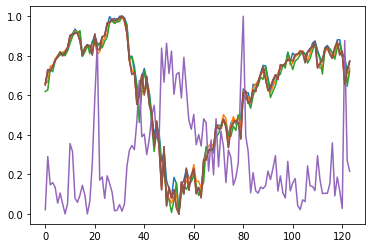

In [70]:
# convert the DataFrame to array and pass that for normalization

Scaled_data = NormalisingData( ConvToNpaArr( df_g ))
print(Scaled_data[:10]) # Displaying only top 10 
plt.plot(Scaled_data)
plt.plot()

## Train-Test split

In [74]:
train_ind = int(0.8*len(df_g)) # 20:80 split
train_scaled_data = Scaled_data[:train_ind] 
test_scaled_data = scaled_data[train_ind:]

In [79]:
print("Size of Train set",len(train_scaled_data),"\nSize of Test set" , len(test_scaled_data)) 

Size of Train set 99 
Size of Test set 25
